In [2]:
import requests
from bs4 import BeautifulSoup
import sqlite3
import time

class HISHotelsScraper:
    def __init__(self, database_name='hotels.db'):
        self.db_name = database_name
        self.create_table()

    def create_table(self):
        """データベースにテーブルを作成する"""
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        c.execute('''
            CREATE TABLE IF NOT EXISTS hotels (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT,
                price TEXT,
                area TEXT
            )
        ''')
        conn.commit()
        conn.close()

    def scrape_hotels(self, url, area):
        """指定されたURLからホテル名と価格をスクレイピングし、データベースに保存する"""
        response = requests.get(url)
        response.raise_for_status()  # ステータスコードが200以外の場合例外を発生させる
        soup = BeautifulSoup(response.content, 'html.parser')

        # ホテル情報を含む要素を探す
        search_items = soup.find_all('div', class_='item-wrap__main')

        # データベースにホテル名と金額を保存する
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        for item in search_items:
            name_tag = item.find('span', class_='item-wrap__title-ja')
            price_tag = item.find('span', class_='price--body')
            if name_tag and price_tag:
                hotel_name = name_tag.get_text(strip=True)
                hotel_price = price_tag.get_text(strip=True)
                c.execute('INSERT INTO hotels (name, price, area) VALUES (?, ?, ?)', (hotel_name, hotel_price, area))
                print(f'Inserting hotel name into DB: {hotel_name}, Price: {hotel_price}, Area: {area}')  # デバッグ用出力

        conn.commit()
        conn.close()

    def get_hotels(self):
        """データベースからホテル名と価格を取得する"""
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        c.execute('SELECT name, price, area FROM hotels')
        hotels = c.fetchall()  # 取得したデータをすべてfetchする
        conn.close()
        return hotels

    def clear_hotels(self):
        """テーブル内の既存のデータをクリア"""
        conn = sqlite3.connect(self.db_name)
        c = conn.cursor()
        c.execute('DELETE FROM hotels')
        conn.commit()
        conn.close()



ModuleNotFoundError: No module named 'requests'

In [ ]:
def main():
    urls_and_areas = [
        ('https://hotel.his-j.com/search/?isAutoSelect=true&checkInDate=20250201&checkOutDate=20250202&prefecture=40&area=259&room=1&room1Adult=1', '福岡市'),
        ('https://hotel.his-j.com/search/?t=KoDl3QI0sklQrCJb&stayPrefecture=40&stayArea=259&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=40&area=258&district=&minRate=0&maxRate=', '北九州'),
        ('https://hotel.his-j.com/search/?t=GRcuxqez8wDYJAMF&stayPrefecture=40&stayArea=258&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=40&area=260&district=&minRate=0&maxRate=', '太宰府'),
        ('https://hotel.his-j.com/search/?t=2LB3Eg02TNiWeHvz&stayPrefecture=40&stayArea=260&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&prefecture=40&area=261&district=&minRate=0&maxRate=', '宗像'),
        ('https://hotel.his-j.com/search/?t=22CNCIODFxBUufqi&stayPrefecture=40&stayArea=261&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=40&area=263&district=&minRate=0&maxRate=', '久留米'),
        ('https://hotel.his-j.com/search/?t=cVvc906fcadc7G6m&stayPrefecture=40&stayArea=263&stayDistrict=&hotelCode=&checkInDate=20250201&checkOutDate=20250202&room1Adult=1&sortHotelKey=recommended&prefecture=40&area=257&district=&minRate=0&maxRate=', '柳川')
    ]

    scraper = HISHotelsScraper()

    # データベース内の既存のデータをクリア
    scraper.clear_hotels()

    # 各URLを順に処理
    for url, area in urls_and_areas:
        # サーバ負荷に配慮してリクエスト間隔を設ける
        time.sleep(2)
        scraper.scrape_hotels(url, area)

    # データベースに保存されたホテル名と金額を取得して表示
    hotels = scraper.get_hotels()
    for hotel in hotels:
        print(f'Hotel from DB: Name: {hotel[0]}, Price: {hotel[1]}, Area: {hotel[2]}')

if __name__ == "__main__":
    main()

Inserting hotel name into DB: ホテル モンテ エルマーナ福岡, Price: 30,350, Area: 福岡市
Inserting hotel name into DB: lyf Tenjin Fukuoka（ライフ天神福岡）, Price: 40,120, Area: 福岡市
Inserting hotel name into DB: 変なホテル福岡博多, Price: 23,730, Area: 福岡市
Inserting hotel name into DB: ヒルトン福岡シーホーク, Price: 54,820, Area: 福岡市
Inserting hotel name into DB: ホテルウィングインターナショナルセレクト博多駅前, Price: 32,900, Area: 福岡市
Inserting hotel name into DB: ANAクラウンプラザホテル福岡, Price: 45,000, Area: 福岡市
Inserting hotel name into DB: キャナルシティ福岡ワシントンホテル, Price: 17,820, Area: 福岡市
Inserting hotel name into DB: スカイハートホテル博多, Price: 19,210, Area: 福岡市
Inserting hotel name into DB: ホテル日航福岡, Price: 53,680, Area: 福岡市
Inserting hotel name into DB: ザ・ライブリー福岡博多（THE LIVELY　福岡博多）, Price: 37,200, Area: 福岡市
Inserting hotel name into DB: ホテルトリフィート博多祇園, Price: 47,740, Area: 福岡市
Inserting hotel name into DB: the b 博多, Price: 33,000, Area: 福岡市
Inserting hotel name into DB: 東急ステイ福岡天神, Price: 20,000, Area: 福岡市
Inserting hotel name into DB: グランドハイアット福岡, Price: 75,900, Area: 福

エリアごとの平均料金:
エリア: 久留米, 平均料金: 9172.50円
エリア: 北九州, 平均料金: 16326.55円
エリア: 太宰府, 平均料金: 23410.00円
エリア: 宗像, 平均料金: 16325.00円
エリア: 柳川, 平均料金: 11268.33円
エリア: 福岡市, 平均料金: 36680.14円
あなたの予算に合ったエリア:
 - 久留米


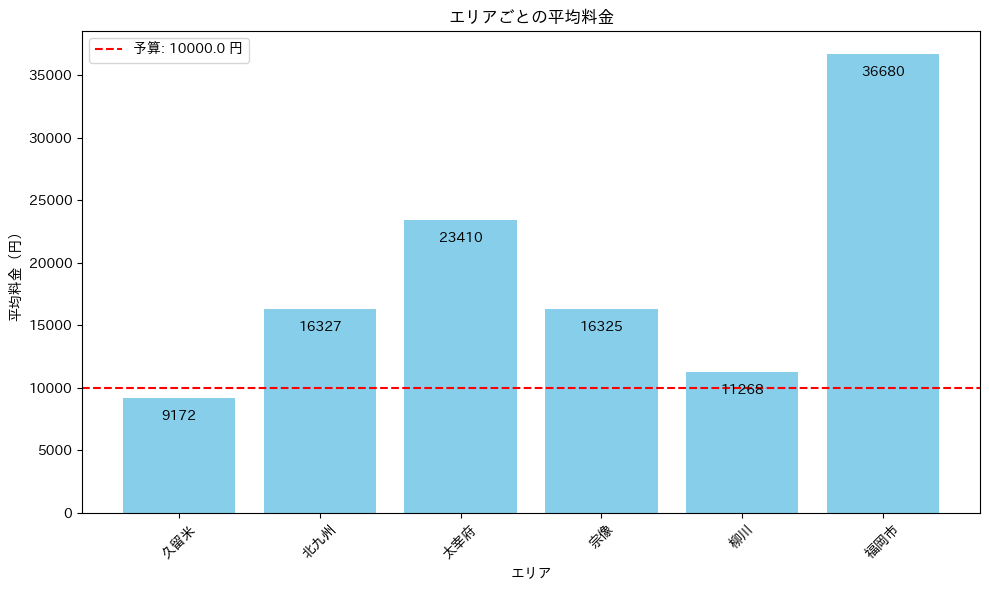

In [2]:
import sqlite3
import matplotlib.pyplot as plt
import japanize_matplotlib


def calculate_average_prices_by_area(database_name='hotels.db'):
    conn = sqlite3.connect(database_name)
    c = conn.cursor()
    
    query = '''
        SELECT area, AVG(CAST(REPLACE(price, ',', '') AS REAL)) as average_price
        FROM hotels
        GROUP BY area
    '''
    
    c.execute(query)
    results = c.fetchall()
    conn.close()
    
    return results

def visualize_average_prices(data, budget=None):
    areas = [x[0] for x in data]
    prices = [x[1] for x in data]

    # 棒グラフを描画
    plt.figure(figsize=(10, 6))
    bars = plt.bar(areas, prices, color='skyblue')
    
    # 予算ラインを追加
    if budget is not None:
        plt.axhline(y=budget, color='r', linestyle='--', label=f'予算: {budget} 円')
        plt.legend()
    
    plt.xlabel('エリア')
    plt.ylabel('平均料金（円）')
    plt.title('エリアごとの平均料金')
    plt.xticks(rotation=45)
    
    # バーの上に平均料金を表示
    for bar, price in zip(bars, prices):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2000, f'{price:.0f}', 
                 ha='center', va='bottom', color='black')

    plt.tight_layout()
    plt.show()

def get_recommended_areas(average_prices, budget):
    recommendations = [area for area, avg_price in average_prices if avg_price <= budget]
    return recommendations

if __name__ == "__main__":
    data = calculate_average_prices_by_area()
    print("エリアごとの平均料金:")
    for area, avg_price in data:
        print(f"エリア: {area}, 平均料金: {avg_price:.2f}円")

    # 顧客の希望金額を入力
    try:
        user_budget = float(input("あなたの予算を入力してください（円）: "))
    except ValueError:
        print("無効な入力です。数値を入力してください。")
        exit()

    # おすすめのエリアを取得
    recommendations = get_recommended_areas(data, user_budget)

    # おすすめのエリアを表示
    if recommendations:
        print("あなたの予算に合ったエリア:")
        for area in recommendations:
            print(f" - {area}")
    else:
        print("あなたの予算に合うエリアが見つかりませんでした。")

    # グラフを表示
    visualize_average_prices(data, budget=user_budget)